In [ ]:
# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ
!pip install lifetimes
!pip install openpyxl


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 584.2/584.2 kB 14.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.3/115.3 kB 13.3 MB/s eta 0:00:00


In [ ]:
from datetime import datetime, timedelta,date, dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter

from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, space_eval, Trials

#  CLV, LTVÏùò Í¥ÄÏ†ê

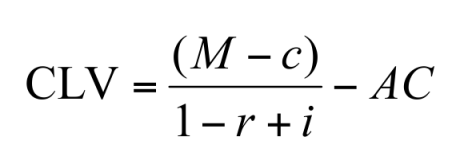

* M: Í≥†Í∞ù 1Ïù∏Îãπ ÌèâÍ∑† Îß§Ï∂ú (Î≥¥ÌÜµ 1ÎÖÑÎã®ÏúÑ)
* c: Í≥†Í∞ù 1Ïù∏Îãπ ÌèâÍ∑† ÎπÑÏö©
* r: Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏú®(retention rate), Í≥†Í∞ùÏù¥ Îã§ÏùåÌï¥ÏóêÎèÑ Ïó¨Ï†ÑÌûà ÎÇ®ÏïÑ ÏûàÏùÑ ÌôïÎ•†
* i: Ïù¥ÏûêÏú®, Ìï†Ïù∏Ïú® (Í≥†Î†§Ìï¥Ïïº ÌïòÎäî Ïù¥Ïú†: ÌôîÌèêÏùò Í∞ÄÏπòÎäî Îß§ÎÖÑ Îã¨ÎùºÏßÑÎã§.)
* AC: Í≥†Í∞ù ÌöçÎìù ÎπÑÏö©(Acqusition Cost), Í≥†Í∞ùÏù¥ Ï≤´ Î∞©Î¨∏,Íµ¨Îß§ ÌïòÎèÑÎ°ù ÌïòÎäîÎç∞ ÎìúÎäî ÎπÑÏö©
* (‚úîÔ∏è Ïñ¥Îñ§ Í¥ÄÏ†êÏóêÏÑú ÌèâÍ∞ÄÌïòÎäêÎÉêÏóê Îî∞Îùº CLVÎ•º Ï∂îÏ†ïÌïòÎäî ÏãùÏù¥ Îã§Î•¥Í≥†. Ï∂îÏ†ïÌïòÎäî Î∞©Î≤ïÏù¥ Îã§ÏñëÌïòÎã§.)

In [ ]:
M = 10000
c = 3000
r = 0.8
i = 0.1
AC= 5000

# CLV = ((M - c) * (1 + r) / (1 + i - r)) - AC
CLV = ((M-c)/(1-r+i)) - AC
CLV

18333.33333333334

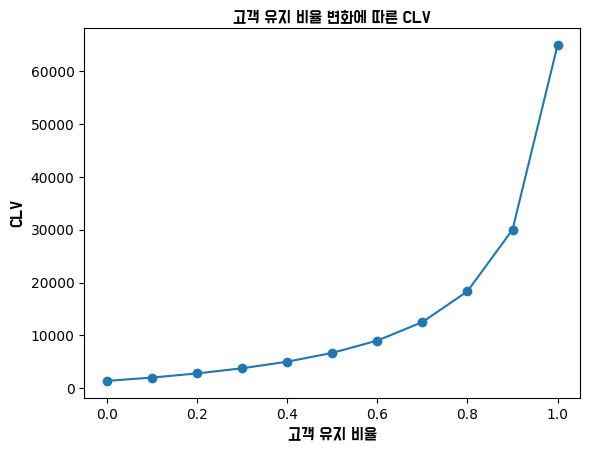

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ï£ºÏñ¥ÏßÑ Í∞í
M = 10000
c = 3000
i = 0.1
AC= 5000


# Îã§ÏñëÌïú Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏú®Ïóê ÎåÄÌïú Í≥ÑÏÇ∞
r = np.arange(0, 1.1, 0.1)
ltvs = ((M-c)/(1-r+i)) - AC

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
font_path = "/content/BMDOHYEON_ttf.ttf"
custom_font = fm.FontProperties(fname=font_path)

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.plot(r, ltvs, marker='o')
plt.xlabel('Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏú®', fontproperties=custom_font)
plt.ylabel('CLV', fontproperties=custom_font)
plt.title('Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏú® Î≥ÄÌôîÏóê Îî∞Î•∏ CLV', fontproperties=custom_font)
plt.show()



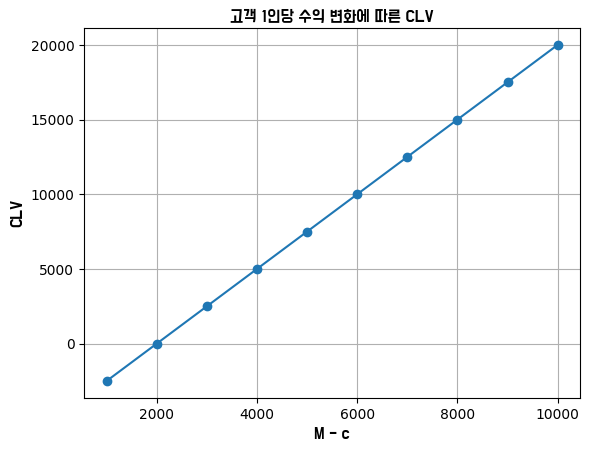

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ï£ºÏñ¥ÏßÑ Í∞í
c = 3000   # ÌèâÍ∑† ÎπÑÏö©
r = 0.7 # Í≥†Í∞ù Ïú†ÏßÄ ÎπÑÏú®
i = 0.1 # Ïù¥ÏûêÏú® ÎòêÎäî Ìï†Ïù∏Ïú®
AC = 5000  # Í≥†Í∞ù ÌöçÎìù ÎπÑÏö©

# Îã§ÏñëÌïú Í≥†Í∞ù 1Ïù∏Îãπ ÏàòÏùµÏóê ÎåÄÌïú Í≥ÑÏÇ∞
revenues_per_customer = np.arange(1000, 10001, 1000)  # 0Î∂ÄÌÑ∞ 10000ÍπåÏßÄ 1000 Í∞ÑÍ≤©Ïùò Í∞í
ltvs = ((revenues_per_customer)/(1-r+i)) - AC

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.plot(revenues_per_customer, ltvs, marker='o')
plt.xlabel('M - c',fontproperties=custom_font)
plt.ylabel('CLV',fontproperties=custom_font)
plt.title('Í≥†Í∞ù 1Ïù∏Îãπ ÏàòÏùµ Î≥ÄÌôîÏóê Îî∞Î•∏ CLV',fontproperties=custom_font)
plt.grid(True)
plt.show()


‚úîÔ∏è ÎãπÏû•Ïùò ÌÅ∞Îß§Ï∂úÏùÑ ÎÜíÏù¥Í∏∞Î≥¥Îã§, Ï†ÅÏ†àÌïú ÎπÑÏö©(AC)ÏùÑ ÌÜµÌïú ÎßàÏºÄÌåÖÏùÑ Ïù¥Ïö©ÌïòÍ≥†, 1Ïù∏ Í∏∞Ïó¨Ïï°(M-c) Í≥º Í≥†Í∞ùÏùÑ Ïñ¥ÎñªÍ≤å Ïú†ÏßÄÌï†ÏßÄ(r)Ïóê ÏßëÏ§ëÌïòÎäîÍ≤å CLV(=LTV) Ïùò Í¥ÄÏ†êÏù¥Î©∞
Í∑∏Ï§ëÏóêÏÑú rÏù¥ ÍµâÏû•Ìûà Ï§ëÏöîÌïòÎã§! ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§.

# LTV BG/NBD  Gamma Gamma Î™®Îç∏ [ÏòàÏ†ú](https://www.databricks.com/notebooks/clv_part2_estimating_future_spend.html) / [Ï∞∏Í≥†](https://playinpap.github.io/ltv-practice/#%EC%B5%9C%EC%A0%81%EC%9D%98-l2-penalty-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%B0%BE%EA%B8%B0)


Ïù¥Î≤àÏóêÎäî  BG/NBD ÏôÄ Gamma Gamma Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú LTV Í∞íÏùÑ ÏÇ∞Ï∂úÌï¥Î≥¥Ïûê.

> LTV = ÎØ∏ÎûòÏùò ÏòàÏÉÅ Íµ¨Îß§ ÌöüÏàò * ÏòàÏÉÅ ÌèâÍ∑† ÏàòÏùµ


> BG/NBD Î™®Îç∏ÏùÄ Í∞Å Í≥†Í∞ùÏùò Íµ¨Îß§ ÌñâÎèô Î∂ÑÌè¨Î•º Î™®Îç∏ÎßÅÌïòÍ≥† Í∞Å Í≥†Í∞ùÏùò ÏòàÏÉÅ Í±∞Îûò ÏàòÎ•º ÏòàÏ∏°Ìï©ÎãàÎã§.

> Í∞êÎßà-Í∞êÎßà ÌïòÏúÑ Î™®Îç∏ÏùÄ ÏòàÏÉÅ ÌèâÍ∑† Ïù¥Ïùµ Î∂ÑÌè¨Î•º Î™®Îç∏ÎßÅÌïòÍ≥† Í∞Å Í≥†Í∞ùÏùò ÏòàÏÉÅ ÌèâÍ∑† Ïù¥ÏùµÏùÑ ÏòàÏ∏°Ìï©ÎãàÎã§.


### ÏúÑ Î™®Îç∏ÏùÑ ÌÜµÌï¥ÏÑú ÏñªÏùÑ Ïàò ÏûàÎäîÍ≤ÉÏùÄ Î¨¥ÏóáÏù∏ÏßÄ ÏöîÏïΩÌï¥Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

* Îã§Ïùå Í∏∞Í∞ÑÏóêÎäî Ïñ¥Îñ§ Í≥†Í∞ùÏù¥ Íµ¨Îß§Î•º ÌïòÍ≤å Îê† Í≤ÉÏù∏ÏßÄ
* ÏÉÅÏúÑ N Í≥†Í∞ùÏùÄ Îã§Ïùå Í∏∞Í∞ÑÏóê Í∞ÄÏû• ÎßéÏùÄ Íµ¨Îß§Î•º Ìï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎäîÏßÄ



# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
 kaggle apiÎ°ú Î∞õÏïÑÏò§Ïûê
 Ïù¥Î≤àÏóê Ïã§ÏäµÌï† Îç∞Ïù¥ÌÑ∞Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"omgcs7750","key":"869481b659ffb4a79e258ade1e024283"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nathaniel/uci-online-retail-ii-data-set

 76% 33.0M/43.3M [00:00<00:00, 69.8MB/s]
100% 43.3M/43.3M [00:00<00:00, 84.5MB/s]


In [ ]:
root = '/content/uci-online-retail-ii-data-set.zip'

!unzip -o {root} -d /content


Archive:  /content/uci-online-retail-ii-data-set.zip
  inflating: /content/online_retail_II.xlsx  


In [ ]:
df = pd.read_excel('/content/online_retail_II.xlsx')
df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[525461 rows x 8 columns]

## datainfo
* Invoice: Invoice number. If this number starts with ‚ÄòC‚Äô, it means this transaction is cancelled.
(ÏÜ°Ïû• Î≤àÌò∏ Ïù¥Î©∞, C Ïù∏Í≤ΩÏö∞ Ï∑®ÏÜåÎ•º ÏùòÎØ∏ÌïúÎã§)

* StockCode: Product code (ÏÉÅÌíà ÏΩîÎìú)
* Description: Product Name (ÏÉÅÌíà Ïù¥Î¶Ñ)
* Quantity: Product counts (ÏÉÅÌíà Î¨ºÎüâ)
* InvoiceDate: Transaction date (Í±∞Îûò ÎÇ†Ïßú)
* Price: A single product price (ÏÉÅÌíà Í∞ÄÍ≤©)
* CustomerID: Unique customer number (Ïú†ÎãàÌÅ¨Ìïú Í≥†Í∞ù Î≤àÌò∏)
* Country: Customer‚Äôs country name (Í≥†Í∞ù ÏßÄÏó≠)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


##  Í≥†Í∞ùÎßàÎã§ ÏùºÏûêÎ≥ÑÎ°ú ÏñºÎßàÏπòÎ•º Íµ¨Îß§ÌñàÎäîÏßÄ

* ÏùºÏûêÎ≥ÑÎ°ú Î∞îÍæ∏Í∏∞ÏúÑÌï¥ datetime -> date ÌòïÏúºÎ°ú
* Í≤∞Ï∏°Í∞í Ïª∑
* Ï£ºÎ¨∏ 1Í∞ú Ïù¥ÏÉÅÌïú Í≥†Í∞ù


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df.dropna(inplace=True)

# C Ïù∏Í≤ΩÏö∞ Î∞òÌíàÏúºÎ°ú Ï†úÍ±∞
df = df[~df["Invoice"].str.contains("C", na=False)] # naÍ∞í Ï±ÑÏö∞Îäî Í∏∞Îä•Ïù¥Îã§. naÍ∞íÏùÑ FalseÎ°ú
df = df[df["Quantity"] > 0]
df['TotalPrice'] = df['Price'] * df['Quantity']

In [ ]:
col = ['Customer ID','InvoiceDate', 'TotalPrice']
df2 = df[col]

## BG/NBD Î™®ÌòïÏùò INPUT
* Recency, ÏñºÎßàÎÇò ÏµúÍ∑ºÏóê Íµ¨Îß§ÌñàÎäîÏßÄ
* Frequency, ÏñºÎßàÎÇò ÏûêÏ£º Íµ¨Îß§ÌñàÎäîÏßÄ
* Monetary, ÌèâÍ∑† Í∏àÏï° (ÏñºÎßàÎÇò ÎßéÏù¥ Íµ¨Îß§ÌñàÎäîÏßÄ)
* T, Í≥†Í∞ùÎ≥Ñ Ï≤´Íµ¨Îß§~ ÏßëÍ≥ÑÏùºÍπåÏßÄÏùò ÏãúÍ∞Ñ

In [ ]:
# Ï†úÍ≥µÌïòÎäî Ìå®ÌÇ§ÏßÄ ÏïàÏóêÏÑú Ìé∏ÌïòÍ≤å Íµ¨Ìï†Ïàò ÏûàÎã§.
# Ìï®Ïàò summary_data_from_transaction_data


current_date = df['InvoiceDate'].max()

metrics_df = summary_data_from_transaction_data(df
                                          , customer_id_col = 'Customer ID'
                                          , datetime_col = 'InvoiceDate'
                                          , monetary_value_col='TotalPrice'
                                          , observation_period_end=current_date)
metrics_df.head()

frequency  recency      T  monetary_value
Customer ID                                           
12346.0            6.0    196.0  360.0       47.143333
12347.0            1.0     37.0   39.0      711.790000
12348.0            0.0      0.0   73.0        0.000000
12349.0            2.0    182.0  224.0      801.310000
12351.0            0.0      0.0   10.0        0.000000

In [ ]:
# ÏßÅÏ†ë Í≥ÑÏÇ∞Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞
# FÏôÄ MÏùÑ Í≥ÑÏÇ∞Ìï† Îïå Ï≤´ Íµ¨Îß§ÏùºÏùÑ Ï†úÏô∏ÌïòÎäî Ïù¥Ïú†Îäî
# ‚ÄúÎ∞òÎ≥µÎêòÎäî Íµ¨Îß§ ÌñâÏúÑ‚ÄùÏóê ÎåÄÌïú ÌÜµÍ≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

current_date = df['InvoiceDate'].max()

example = df[df['Customer ID'] == 12347 ]
print(len(example['InvoiceDate'].unique())-1) # ÏñºÎßàÎÇò ÏûêÏ£º ÎπàÎ≤àÌïòÍ≤å Íµ¨Îß§ÌñàÎäîÏßÄ (Ï¥ù 1Î≤àÏ£ºÎ¨∏ )
print(max(example['InvoiceDate'] - min(example['InvoiceDate']))) # Í∞ÄÏû• ÏµúÍ∑ºÏóê Íµ¨Îß§ÌïúÎÇ†Ïßú - Í∞ÄÏû•Ïò§ÎûòÎêúÎÇ†Ïßú  recency
print(current_date - min(example['InvoiceDate'])) # Ï≤´ Íµ¨Îß§Î°úÎ∂ÄÌÑ∞ 39Ïùº ÏßÄÎÇ¨Ïùå

m = example.groupby('InvoiceDate')['TotalPrice'].sum()
m = np.mean(m[1:])
print(m)


1
37 days 00:00:00
39 days, 0:00:00
711.79


## ÏµúÏ†ÅÏùò L2 penalty ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞

* Íµ¨Ìïú RFMTÏùÑ Î™®ÌòïÏóê INPUTÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞Ï†Ñ, [L2 penalty](https://lifetimes.readthedocs.io/en/latest/Quickstart.html)Î•º ÎÑ£Ïñ¥Ï£ºÎ©¥ Î™®ÌòïÏùÑ Ï¢Ä Îçî Í∞ïÍ±¥ÌïòÍ≤å ÎßåÎì§ Ïàò ÏûàÎã§.

* lifetimes Ìå®ÌÇ§ÏßÄÏóêÏÑúÎäî ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º calibration data / ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º holdout dataÎùº Î∂ÄÎ•∏Îã§.

Í∑∏Îü¨Í∏∞ ÏúÑÌï¥ÏÑúÎäî holddout_daysÎ•º Ï†ïÌï¥Ï§òÏïºÌïúÎã§. ÎîîÌè¥Ìä∏Í∞íÏùÑ ÎÑ£Ïñ¥Ï£ºÏóàÎã§.

Í≤∞Í≥ºÎ•º Î≥¥Î©¥ ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê '_cal' ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê '_holdout' Í∞Ä Ï∂îÍ∞Ä ÎêúÍ≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

In [ ]:
# define a notebook parameter making holdout days configurable (90-days default)
# Ïñ¥Îäê ÏãúÏ†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌõàÎ†®/ÌÖåÏä§Ìä∏Î°ú ÎÇòÎàåÏßÄ Ï†ïÌï¥ÏïºÌïúÎã§.

holdout_days = 90
calibration_end_date = current_date - timedelta(days = holdout_days)

metrics_cal_df = calibration_and_holdout_data(df
                                          ,customer_id_col = 'Customer ID'
                                          ,datetime_col = 'InvoiceDate'
                                          ,calibration_period_end=calibration_end_date # train Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ
                                          ,observation_period_end=current_date         # ÎÅù Í∏∞Í∞Ñ
                                          ,monetary_value_col='TotalPrice')

metrics_cal_df.head()

frequency_cal  recency_cal  T_cal  monetary_value_cal  \
Customer ID                                                          
12346.0                6.0        196.0  270.0           47.143333   
12349.0                1.0         19.0  134.0          200.000000   
12355.0                0.0          0.0  112.0            0.000000   
12358.0                1.0        181.0  276.0          268.100000   
12359.0                4.0        199.0  279.0          312.835000   

             frequency_holdout  monetary_value_holdout  duration_holdout  
Customer ID                                                               
12346.0                    0.0                0.000000              90.0  
12349.0                    1.0               25.502182              90.0  
12355.0                    0.0                0.000000              90.0  
12358.0                    1.0               44.394783              90.0  
12359.0                    1.0               17.784839              90.0

### Í≥†Í∞ùÎ≥Ñ RFMTÍ∞Ä Îì§Ïñ¥Í∞Ñ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú frequencyÍ∞Ä 1 Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏôÄÏïºÌïúÎã§.

frequencyÍ∞Ä 0 Ïù∏Í≤ΩÏö∞ , (Ï¥ùÍµ¨Îß§ÏùºÏàò-1) Í∞íÏù¥ 0 Ïù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§.

üëâ Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïà Íµ¨Îß§ ÏùºÏàòÍ∞Ä 1ÏùºÏù∏ Í≥†Í∞ù
üëâ Î∞òÎ≥µÏ†ÅÏù∏ Íµ¨Îß§Î•º Ìïú Í≥†Í∞ùÎì§Ïù¥ ÏïÑÎãàÎã§.
üëâ BG/NBD Î™®ÌòïÏùò Í∞ÄÏ†ïÏóê Ïñ¥Í∏ãÎÇúÎã§.


In [ ]:
## frequencyÍ∞Ä 0Ïù∏ Í≤ÉÏùÄ Ï†úÏô∏

whole_filtered_df = metrics_df[metrics_df.frequency > 0] # ÌõàÎ†®/ÌÖåÏä§Ìä∏Î°ú Î∂ÑÎ¶¨Í∞Ä ÏïàÎêú Îç∞Ïù¥ÌÑ∞

filtered_df = metrics_cal_df[metrics_cal_df.frequency_cal > 0] # L2 ÌéòÎÑêÌã∞Î•º ÏµúÏ†ÅÌïòÍ∏∞ ÏúÑÌï¥ Î∂ÑÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞

In [ ]:
# ÌèâÍ∞Ä ÏßÄÌëú: defaultÎäî MSE
def score_model(actuals, predicted, metric='mse'):

    metric = metric.lower()

    # MSE / RMSE
    if metric=='mse' or metric=='rmse':
        val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    elif metric=='rmse':
        val = np.sqrt(val)
    # MAE
    elif metric=='mae':
        val = np.sum(np.abs(actuals-predicted))/actuals.shape[0]
    else:
        val = None

    return val

# BG/NBD Î™®Ìòï ÌèâÍ∞Ä, Íµ¨Îß§ÏùºÏàò(frequency)
def evaluate_bgnbd_model(param):

    data   = inputs
    l2_reg = param

    # Î™®Ìòï Ï†ÅÌï©
    model = BetaGeoFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])

    # Î™®Ìòï ÌèâÍ∞Ä
    frequency_actual = data['frequency_holdout']
    frequency_predicted = model.predict(data['duration_holdout']
                                        , data['frequency_cal']
                                        , data['recency_cal']
                                        , data['T_cal']
                                       )
    mse = score_model(frequency_actual, frequency_predicted, 'mse')

    return {'loss': mse, 'status': STATUS_OK}

# Gamma/Gamma Î™®Îç∏ ÌèâÍ∞Ä , ÌèâÍ∑†Íµ¨Îß§Í∏àÏï°(monetary value)
def evaluate_gg_model(param):

    data   = inputs
    l2_reg = param

    # GammaGamma Î™®Ìòï Ï†ÅÌï©
    model = GammaGammaFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['monetary_value_cal'])

    # Î™®Ìòï ÌèâÍ∞Ä
    monetary_actual = data['monetary_value_holdout']
    monetary_predicted = model.conditional_expected_average_profit(data['frequency_holdout'], data['monetary_value_holdout'])
    mse = score_model(monetary_actual, monetary_predicted, 'mse')

    # return score and status
    return {'loss': mse, 'status': STATUS_OK}


In [ ]:

search_space = hp.uniform('l2', 0.0, 1.0)
algo = tpe.suggest
trials = Trials()
inputs = filtered_df

argmin = fmin(
  fn = evaluate_bgnbd_model, # Î™©Ï†ÅÌï®Ïàò
  space = search_space,      # ÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ
  algo = algo,               # ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò: Tree of Parzen Estimators (TPE)
  max_evals=100,             # Î∞òÎ≥µÏàò
  trials=trials
  )

l2_bgnbd = space_eval(search_space,argmin)
print(l2_bgnbd)

# BG/NBDÏùò penalizer_coef = 0.9996862043879972

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:13<00:00,  7.39trial/s, best loss: 3.279926477960428]
0.9996862043879972


In [ ]:
trials = Trials()

# GammaGamma
argmin = fmin(
  fn = evaluate_gg_model,
  space = search_space,
  algo = algo,
  max_evals=100,
  trials=trials
  )

l2_gg = space_eval(search_space,argmin)
print(l2_gg)

# gamma gammaÏùò penalizer_coef = 0.006469987501113946


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:06<00:00, 15.98trial/s, best loss: 1082.1110116008713]
0.006469987501113946


## Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î™®Ìòï Ï†ÅÌï©ÌïòÍ∏∞
BG/NBD Î™®ÌòïÏùÄ Í≥†Í∞ùÎ≥Ñ ÎØ∏ÎûòÏùò Íµ¨Îß§ ÌöüÏàò ÏòàÏ∏°


In [ ]:
lifetimes_model = BetaGeoFitter(penalizer_coef=l2_bgnbd) #l2_bgnbd = hyperoptÎ°ú ÎÇòÏò® Í≤∞Í≥º

# calibration Îç∞Ïù¥ÌÑ∞Ïùò R,F,TÎ°ú Î™®Ìòï Ï†ÅÌï©
# train = _cal
lifetimes_model.fit(filtered_df['frequency_cal'], filtered_df['recency_cal'], filtered_df['T_cal'])

# holdout Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌèâÍ∞Ä: FÏùò Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùò MSE
# test = _holdout
frequency_actual = filtered_df['frequency_holdout']
frequency_predicted = lifetimes_model.predict(filtered_df['duration_holdout']
                                    ,filtered_df['frequency_cal']
                                    , filtered_df['recency_cal']
                                    , filtered_df['T_cal'])
mse = score_model(frequency_actual, frequency_predicted, 'mse')
print('MSE: {0}'.format(mse))

# Íµ¨Îß§ÏùºÏàòÏóê ÎåÄÌïú ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® +- 3.2 Ïùº

MSE: 3.279926477960428


In [ ]:
# Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞
lifetimes_model.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.452447  0.009554         0.433722         0.471173
alpha  23.179127  0.973003        21.272042        25.086213
a       0.001436  0.000920        -0.000366         0.003239
b       0.023135  0.013261        -0.002856         0.049126

In [ ]:
coefs['a']

0.001435916193621895

## BG/NBD Î™®ÌòïÏùò Í∞ÄÏ†ïÏóê ÎÇòÏò§Îäî Î™®ÏàòÎì§
r, alpha, a, b ÏúÑ Î™®ÏàòÎì§ÏùÑ Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

- Í≥†Í∞ùÎßàÎã§ ÏùºÏ†ïÌïú Í∏∞Í∞Ñ ÎèôÏïà Íµ¨Îß§ÌïòÎäî ÌöüÏàòÎäî Îã§Î•¥Îã§. Ïù¥ÎäîŒª ~ Gamma (r,Œ±)ÏùÑ Îî∞Î•∏Îã§.

- Í≥†Í∞ùÎßàÎã§ Îçî Ïù¥ÏÉÅ Íµ¨Îß§Î•º ÌïòÏßÄ ÏïäÏùÑ ÌôïÎ•†(Ïù¥ÌÉàÎ•†)ÏùÄ Îã§Î•¥Îã§. Ïù¥ÌÉàÎ•†ÏùÄ p- p~Beta(a,b)Î•º Îî∞Î•∏Îã§.

- Í≥†Í∞ùÎ≥Ñ ÏùºÏ†ï Í∏∞Í∞Ñ ÎèôÏïàÏùò Íµ¨Îß§ ÌöüÏàòÏôÄ Íµ¨Îß§Î•º ÌïòÏßÄ ÏïäÏùÑ ÌôïÎ•†ÏùÄ ÏÑúÎ°ú ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§.

1,2 Î≤àÏóê Ìï¥Îãπ => Gamma(r,Œ±) ÏôÄ Beta(a,b)

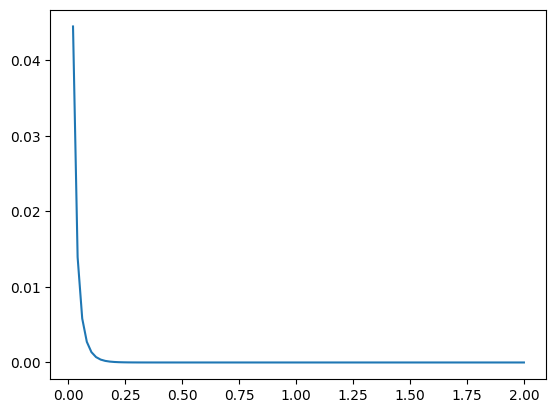

In [ ]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

coefs = lifetimes_model.summary['coef']
x = np.linspace (0, 2, 100)
y = gamma.pdf(x, a=coefs['a'], scale=1/coefs['alpha']) # BG/NBDÏóêÏÑúÏùò Î™®Ïàò alphaÎäî scale Î™®ÏàòÍ∞Ä ÏïÑÎãå rate Î™®ÏàòÏù¥ÎØÄÎ°ú Ïó≠Ïàò!

plt.plot(x, y)

## gamma gamaa Î™®Ìòï Ï†ÅÏö©

In [ ]:
spend_model = GammaGammaFitter(penalizer_coef=l2_gg)
spend_model.fit(filtered_df['frequency_cal'], filtered_df['monetary_value_cal'])

# conditional_expected_average_profit: Í≥†Í∞ùÎ≥Ñ ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï° ÏòàÏ∏°
monetary_actual = filtered_df['monetary_value_holdout']
monetary_predicted = spend_model.conditional_expected_average_profit(filtered_df['frequency_holdout']
                                                                    ,filtered_df['monetary_value_holdout'])

mse = score_model(monetary_actual, monetary_predicted, 'mse')

print('MSE: {0}'.format(mse))

MSE: 1082.1110116008713


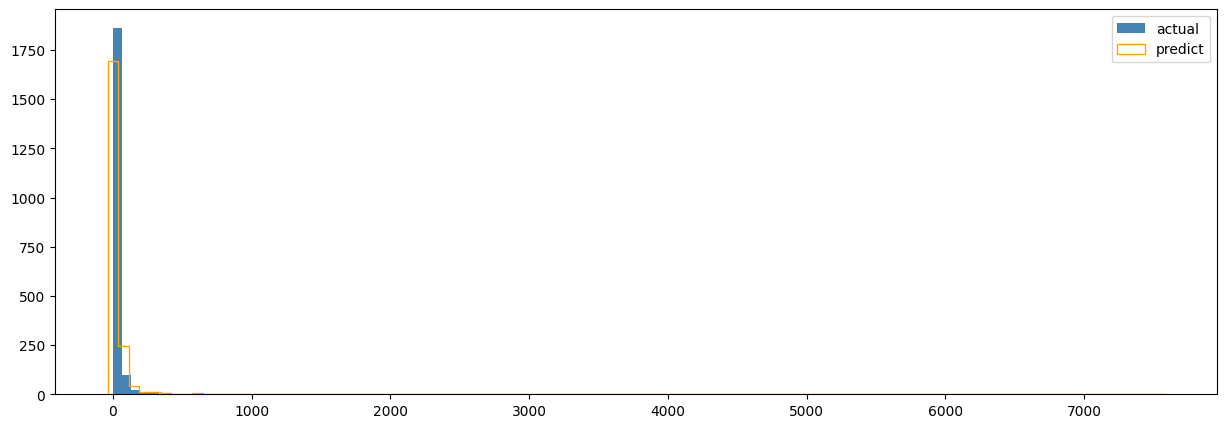

In [ ]:
bins = 100
plt.figure(figsize=(15, 5))

plt.hist(monetary_actual, bins, label='actual', histtype='bar', color='STEELBLUE', rwidth=0.99)
plt.hist(monetary_predicted, bins, label='predict', histtype='step', color='ORANGE',  rwidth=0.99)
plt.legend(loc='upper right')

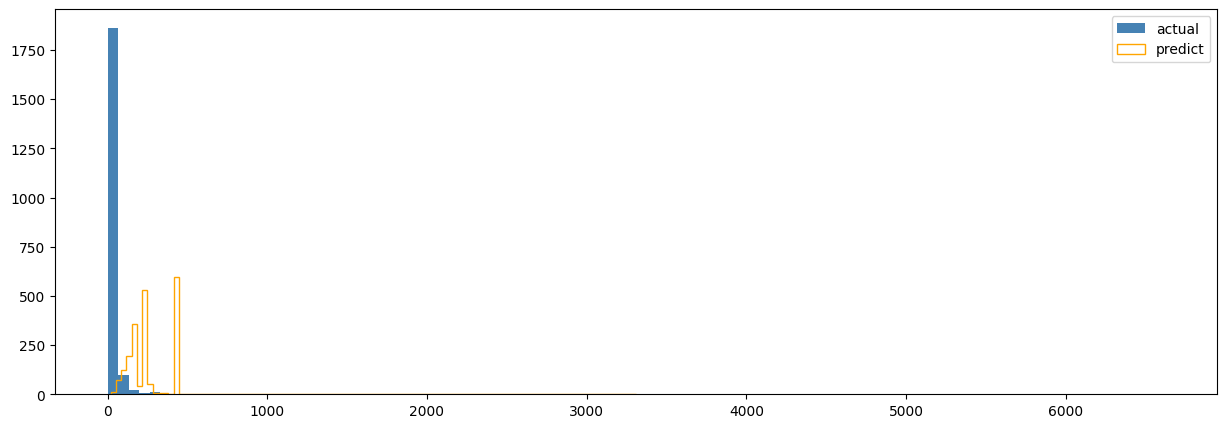

In [ ]:
# penalizer_coef ÏóÜÏù¥ ÌñàÏùÑ ÎïåÏùò Í≤∞Í≥º
spend_model = GammaGammaFitter(penalizer_coef=0)
spend_model.fit(filtered_df['frequency_cal'], filtered_df['monetary_value_cal'])

# ÌèâÍ∞Ä
monetary_actual = filtered_df['monetary_value_holdout']
monetary_predicted = spend_model.conditional_expected_average_profit(filtered_df['frequency_holdout']
                                                                    ,filtered_df['monetary_value_holdout'])

mse = score_model(monetary_actual, monetary_predicted, 'mse')

bins = 100
plt.figure(figsize=(15, 5))

plt.hist(monetary_actual, bins, label='actual', histtype='bar', color='STEELBLUE', rwidth=0.99)
plt.hist( monetary_predicted, bins, label='predict', histtype='step', color='ORANGE',  rwidth=0.99)
plt.legend(loc='upper right')

# LTV Íµ¨ÌïòÍ∏∞

In [ ]:
final_df = whole_filtered_df.copy() # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÎåÄÏÉÅ
final_df['ltv'] = spend_model.customer_lifetime_value(lifetimes_model,
                                                     final_df['frequency'],
                                                     final_df['recency'],
                                                     final_df['T'],
                                                     final_df['monetary_value'],
                                                     time=12,
                                                     discount_rate=0.01 # monthly discount rate ~12.7% Ïó∞Í∞Ñ
                                                     )

In [ ]:
# NBD Î™®Ìòï -   ÏòàÏÉÅ Íµ¨Îß§ ÌöüÏàò
# Í∏∞Í∞ÑÏùÄ Ï†ïÌï† Ïàò ÏûàÎã§ t = 365
final_df['predicted_purchases'] = lifetimes_model.conditional_expected_number_of_purchases_up_to_time(t
                                                                                      , final_df['frequency']
                                                                                     , final_df['recency']
                                                                                     , final_df['T'])

In [ ]:
# gamma gamma Î™®Ìòï-  output "ÏòàÏÉÅ ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°"
final_df['predicted_monetary_value'] = spend_model.conditional_expected_average_profit(final_df['frequency']
                                                                    ,final_df['monetary_value'])



In [ ]:
final_df.sort_values(by="ltv", ascending=False).head(5)

frequency  recency      T  monetary_value            ltv  \
Customer ID                                                             
18102.0           42.0    373.0  373.0     8259.002619  291137.493713   
14646.0           45.0    363.0  372.0     5393.010222  204527.701978   
14156.0           78.0    367.0  373.0     2506.409487  165471.495699   
14911.0          127.0    373.0  373.0     1192.235748  128686.433543   
13694.0           48.0    362.0  370.0     2685.693750  109487.873163   

             predicted_purchases  predicted_monetary_value  
Customer ID                                                 
18102.0                39.089220               8051.145648  
14646.0                41.955018               5269.686420  
14156.0                72.235718               2476.211914  
14911.0               117.359114               1185.311744  
13694.0                44.952078               2632.890363

# Ìï¥ÏÑù

* Í∞ÄÏû• ÎÜíÏùÄ ltv Í∞íÏùÑ Í∞ñÎäî Í≥†Í∞ù : 18102.0 Í≥†Í∞ù
* ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°Ïù¥ '8259' Î°ú Í∞ÄÏû• ÎÜíÎã§. ÏïΩ, 13,780,719 Ïõê
* 373Ïùº ÎèôÏïà 42Î≤à Íµ¨Îß§ÌñàÎã§. ÏïΩ, 9ÏùºÏóê ÌïúÎ≤àÍº¥Î°ú Íµ¨Îß§ÌïòÎäî Í≥†Í∞ù
* T-recency Í∞íÏù¥ 0 , Ïò§ÎäòÎèÑ Íµ¨Îß§ÌñàÎã§.

> LTV Î™®ÌòïÏùÑ ÌÜµÌï¥ÏÑú ÎÇ¥ÎÖÑÏóê 4.8Ïñµ Ï†ïÎèÑÏùò Í∏àÏï°ÏùÑ Ïì∏ Í±∞ÎùºÍ≥† ÏòàÏÉÅÌñàÎã§.

Ïù¥Îäî bg/nbd Î™®ÌòïÏúºÎ°ú ÏòàÏ∏°Îêú Íµ¨Îß§ÌöåÏàò 39 ÏôÄ, gamma gamma Î™®ÌòïÏúºÎ°ú ÏòàÏ∏°Îêú 13,800,000 ÏõêÏùÑ Í≥±ÌïòÍ≥† Ìï†Ïù∏Ïú®ÏùÑ Ï†ÅÏö©ÏãúÌÇ® ÏòàÏ∏°Í∞íÏù¥Îã§!

> ÎßåÏïΩ Î™®ÌòïÏùÑ Ïì∞ÏßÄ ÏïäÍ≥†, Îã®ÏàúÌûà Í≥ÑÏÇ∞ÌïúÎã§Î©¥. 42 * 13,800,000 Ïõê  = 5.8Ïñµ Ï†ïÎèÑ Íµ¨Îß§Ìï†Í±∞ÎùºÍ≥† ÏòàÏÉÅÌïòÍ≤å ÎêúÎã§.





## Ìï®ÏàòÎ™Ö Ï†ïÎ¶¨




|Ìï®ÏàòÎ™Ö|	Ïö©ÎèÑ|
|:---:|:---:|
|summary_data_from_transaction_data	|Íµ¨Îß§Í∏∞Î°ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥†Í∞ùÎ≥Ñ RFMT Í≥ÑÏÇ∞
|calibration_and_holdout_data	ÌõàÎ†®| / ÌÖåÏä§Ìä∏Î•º ÎÇòÎà† Í≥†Í∞ùÎ≥Ñ RFMT Í≥ÑÏÇ∞
|fmin|	L2 penalty ÏµúÏ†ÅÌôî
|BetaGeoFitter|	ÏòàÏÉÅ Íµ¨Îß§ ÏùºÏàòÎ•º Íµ¨ÌïòÍ∏∞ ÏúÑÌïú BG/NBD Î™®Ìòï Ï†ÅÌï®
|conditional_expected_number_of_purchases_up_to_time	|t ÏãúÏ†êÍπåÏßÄÏùò ÏòàÏÉÅ Íµ¨Îß§ ÏùºÏàò Í≥ÑÏÇ∞
|GammaGammaFitter|	ÏòàÏÉÅ ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°ÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌïú Gamma-Gamma Î™®Ìòï Ï†ÅÌï©
|conditional_expected_average_profit|	ÏòàÏÉÅ ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï° Í≥ÑÏÇ∞
|customer_lifetime_value|	Í≥†Í∞ùÎ≥Ñ LTV Í≥ÑÏÇ∞

[ÏûêÎ£å](https://playinpap.github.io/ltv-practice/#%EC%B5%9C%EC%A0%81%EC%9D%98-l2-penalty-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%B0%BE%EA%B8%B0)